In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetic-retinopathy-224x224-2019-data/train.csv
/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/f481f76a6b75.png
/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/abdb365cacbc.png
/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/33ffddea8c6e.png
/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/059bc89df7f4.png
/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/278aa860dffd.png
/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/d66b6f333dc7.png
/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/a8c950a99107.png
/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/cab3dfa7962d.png
/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/63363410389a.png
/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/4da2961e62fe.png
/kaggle/input/diabetic-retinopathy-22

In [57]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
df =pd.read_csv( "/kaggle/input/diabetic-retinopathy-224x224-2019-data/train.csv" )

In [32]:
folder_path="/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images"

In [33]:
df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [34]:
df["diagnosis"]=df["diagnosis"].map({0:"No_DR",1:"Mild",2:"Moderate",3:"Severe",4:"Proliferate_DR"})

In [35]:
No_DR_df=df[df["diagnosis"]=="No_DR"]
Mild_df=df[df["diagnosis"]=="Mild"]
Moderate_df=df[df["diagnosis"]=="Moderate"]
Severe_df=df[df["diagnosis"]=="Severe"]
Proliferate_DR_df=df[df["diagnosis"]=="Proliferate_DR"]

In [36]:
No_DR_df["filename"] = No_DR_df["id_code"].apply(lambda x: os.path.join("No_DR", x + ".png"))
Mild_df["filename"] = Mild_df["id_code"].apply(lambda x: os.path.join("Mild", x + ".png"))
Moderate_df["filename"] = Moderate_df["id_code"].apply(lambda x: os.path.join("Moderate", x + ".png"))
Severe_df["filename"] = Severe_df["id_code"].apply(lambda x: os.path.join("Severe", x + ".png"))
Proliferate_DR_df["filename"] = Proliferate_DR_df["id_code"].apply(lambda x: os.path.join("Proliferate_DR", x + ".png"))

/tmp/ipykernel_36/2398183150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  No_DR_df["filename"] = No_DR_df["id_code"].apply(lambda x: os.path.join("No_DR", x + ".png"))
/tmp/ipykernel_36/2398183150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mild_df["filename"] = Mild_df["id_code"].apply(lambda x: os.path.join("Mild", x + ".png"))
/tmp/ipykernel_36/2398183150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [37]:
final_df = pd.concat([ No_DR_df, Mild_df, Moderate_df, Severe_df, Proliferate_DR_df ], ignore_index=True)


In [38]:
final_df=final_df.drop("id_code",axis=1)

In [39]:
final_df

,diagnosis,filename
0,No_DR,No_DR/002c21358ce6.png
1,No_DR,No_DR/005b95c28852.png
2,No_DR,No_DR/0097f532ac9f.png
3,No_DR,No_DR/00cc2b75cddd.png
4,No_DR,No_DR/00f6c1be5a33.png
...,...,...
3657,Proliferate_DR,Proliferate_DR/fa59221cf464.png
3658,Proliferate_DR,Proliferate_DR/fb696a8e055a.png
3659,Proliferate_DR,Proliferate_DR/fce93caa4758.png
3660,Proliferate_DR,Proliferate_DR/fdd534271f3d.png


In [45]:
train_df = final_df.sample(frac=1,random_state=0).iloc[:2000]
test_df =  final_df.sample(frac=1,random_state=0).iloc[1000:]
val_df =  final_df.sample(frac=1,random_state=0).iloc[0:500]

In [42]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [50]:
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    directory=folder_path,
                                                    x_col='filename',
                                                    y_col='diagnosis',
                                                    target_size=(200,200),
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_dataframe(test_df,
                                                    directory=folder_path,
                                                    x_col='filename',
                                                    y_col='diagnosis',
                                                    target_size=(200,200),
                                                  class_mode='categorical')

val_generator = test_datagen.flow_from_dataframe(val_df,
                                                    directory=folder_path,
                                                    x_col='filename',
                                                    y_col='diagnosis',
                                                    target_size=(200,200),
                                                  class_mode='categorical')

Found 2000 validated image filenames belonging to 5 classes.
Found 2662 validated image filenames belonging to 5 classes.
Found 500 validated image filenames belonging to 5 classes.


In [64]:
# === Step 6: CNN Model Architecture ===
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax'))



In [65]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     8,667,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,769,093 (33.45 MB)

 Trainable params: 8,769,093 (33.45 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
# === Step 8: Add Early Stopping ===
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=4,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)


In [67]:
# === Step 9: Train the Model ===
history= model.fit( train_generator, validation_data=test_generator, epochs=50, callbacks=callback )


Epoch 1/50


I0000 00:00:1754161855.639194     145 service.cc:148] XLA service 0x7a7d48003740 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754161855.640140     145 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1754161855.640162     145 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1754161856.039532     145 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/63 ━━━━━━━━━━━━━━━━━━━━ 9:24 9s/step - accuracy: 0.3438 - loss: 1.6021

I0000 00:00:1754161861.484268     145 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


63/63 ━━━━━━━━━━━━━━━━━━━━ 65s 897ms/step - accuracy: 0.4854 - loss: 1.3125 - val_accuracy: 0.7081 - val_loss: 0.9357
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 527ms/step - accuracy: 0.6506 - loss: 0.9712 - val_accuracy: 0.6649 - val_loss: 0.9495
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 498ms/step - accuracy: 0.6696 - loss: 0.9997 - val_accuracy: 0.7085 - val_loss: 0.8400
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 499ms/step - accuracy: 0.6741 - loss: 0.9531 - val_accuracy: 0.7089 - val_loss: 0.8207
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 608ms/step - accuracy: 0.6731 - loss: 0.9200 - val_accuracy: 0.7205 - val_loss: 0.7961
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 444ms/step - accuracy: 0.6904 - loss: 0.9131 - val_accuracy: 0.7213 - val_loss: 0.8215
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 424ms/step - accuracy: 0.6838 - loss: 0.8958 - val_accuracy: 0.7198 - val_loss: 0.8044
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 423ms/step - accuracy: 0.7044 - loss: 0.8666 - val_accuracy: 0.711

In [68]:
model.save('my_model.h5')  # saves the entire model to an HDF5 file


In [69]:
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())


84/84 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step


In [73]:
results = []

for i in range(16):  # number of images to show
    img, label = test_generator[i]
    img_np = img[0]  # (1, h, w, c) → (h, w, c)

    true_index = np.argmax(label[0])
    pred_index = predicted_classes[i]

    results.append({
        'image': img_np,
        'true_label': true_index,
        'pred_label': pred_index
    })


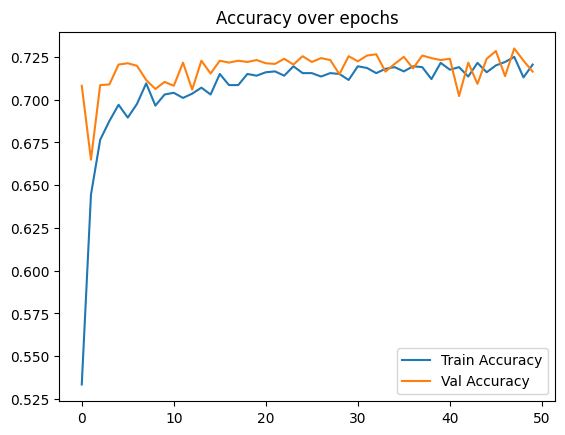

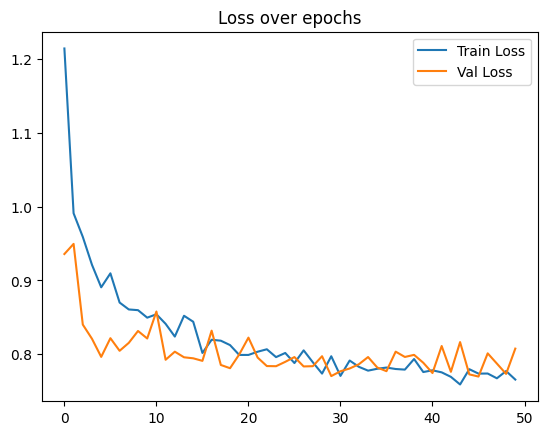

In [78]:
# Plot accuracy and loss curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.legend()
plt.show()

In [76]:
def show_predictions(results, class_names, num_images=10):
    plt.figure(figsize=(16, 16))
    for i in range(min(num_images, len(results))):
        img = results[i]['image']
        true = class_names[results[i]['true_label']]
        pred = class_names[results[i]['pred_label']]
        correct = (true == pred)

        plt.subplot(4, 4, i + 1)
        plt.imshow(img)
        plt.axis('off')
        title = f"True: {true}\nPred: {pred}"
        plt.title(title, color='green' if correct else 'red')
    
    plt.tight_layout()
    plt.show()


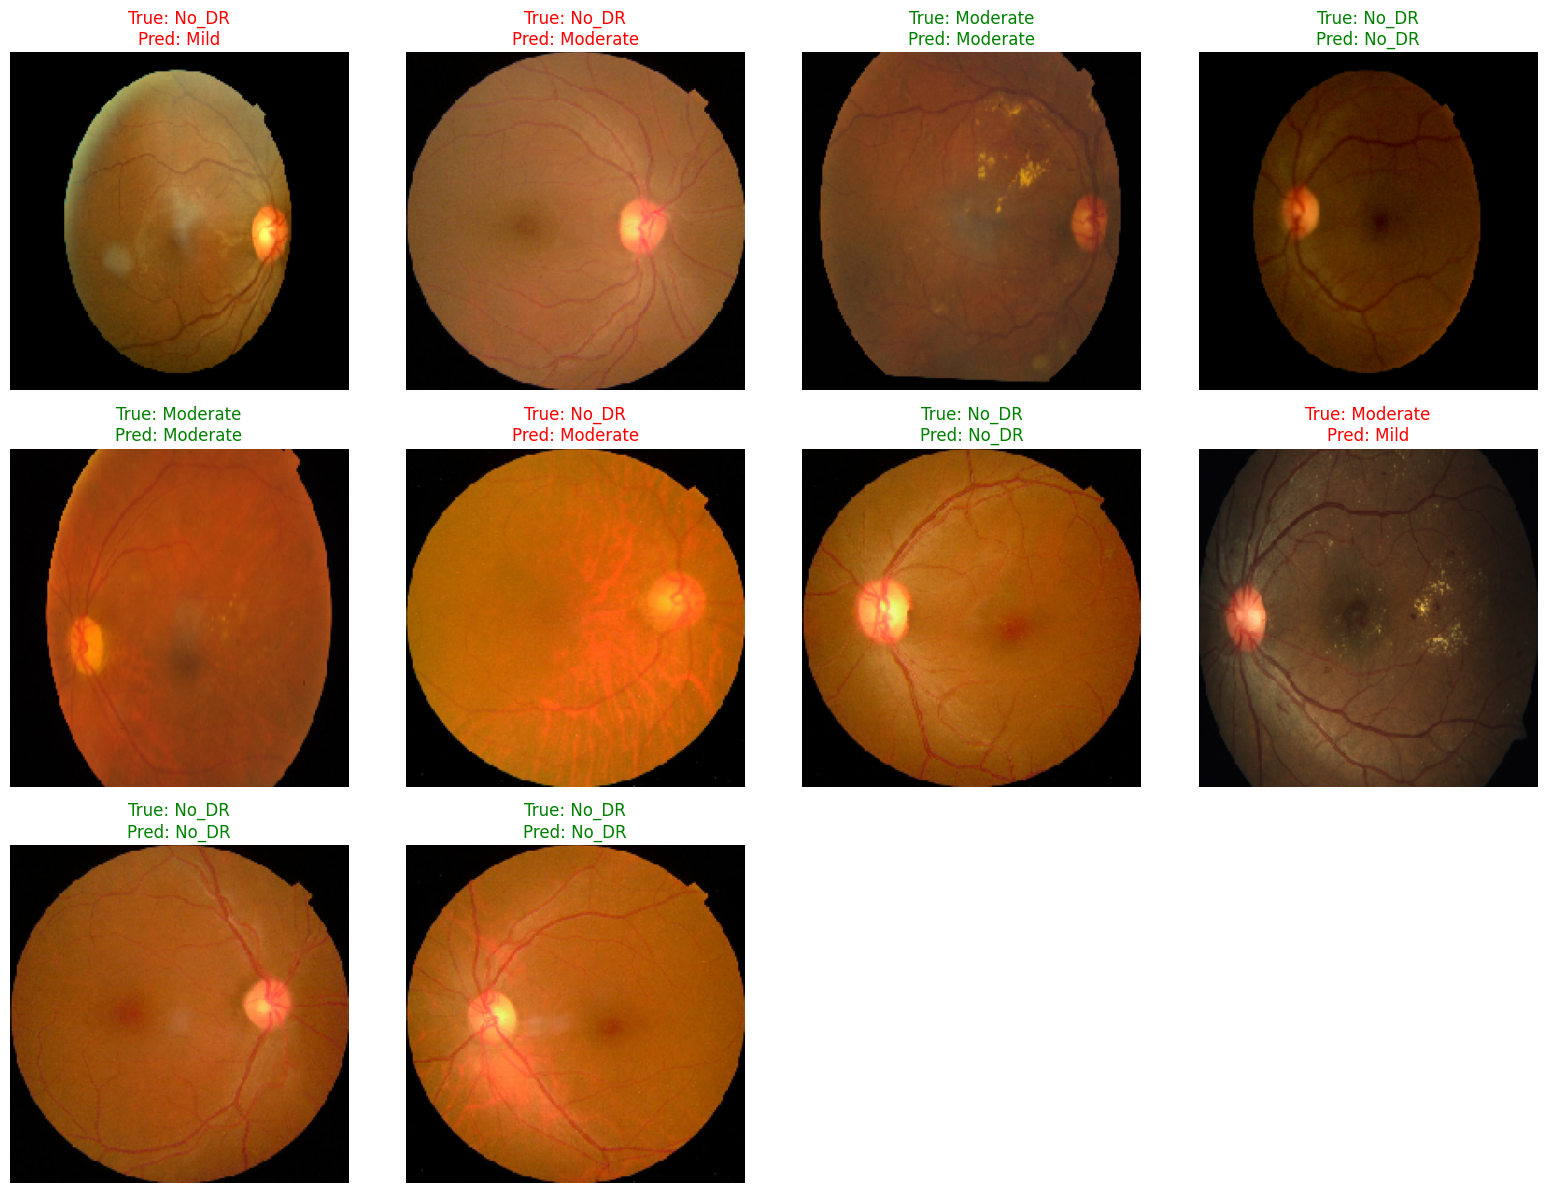

In [77]:
show_predictions(results, class_names=class_labels, num_images=10)
